<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-17 10:36:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.9MB/s    in 2.4s    

2025-07-17 10:36:24 (62.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


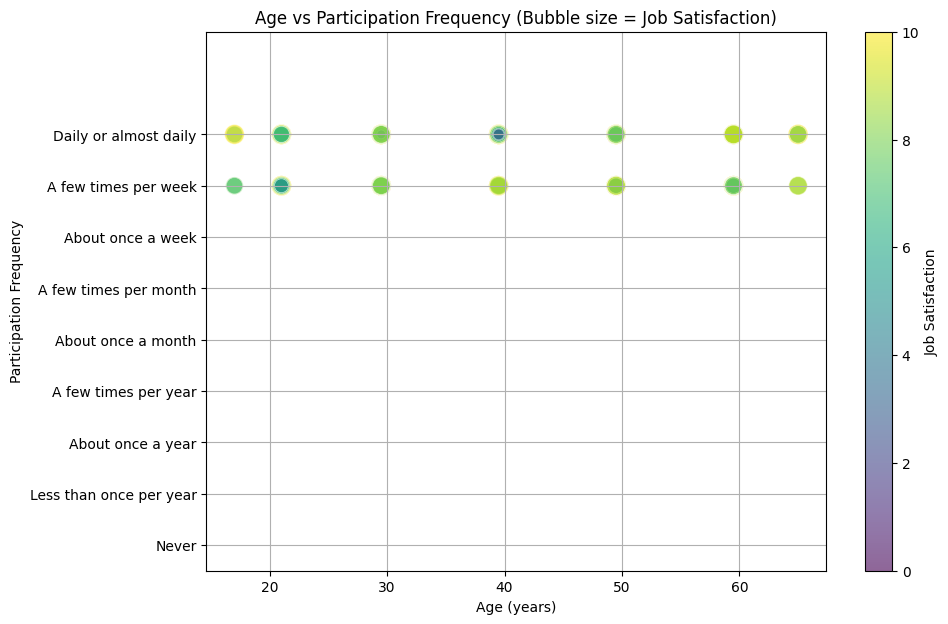

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Age to numeric (reuse if needed)
def convert_age_to_num(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 65
    }
    return mapping.get(age_str, None)

df['Age_numeric'] = df['Age'].apply(convert_age_to_num)

# Map SOPartFreq to numeric scale (example order)
freq_mapping = {
    'Never': 0,
    'Less than once per year': 1,
    'About once a year': 2,
    'A few times per year': 3,
    'About once a month': 4,
    'A few times per month': 5,
    'About once a week': 6,
    'A few times per week': 7,
    'Daily or almost daily': 8
}

df['SOPartFreq_num'] = df['SOPartFreq'].map(freq_mapping)

# Filter relevant columns and drop rows with missing values
plot_data = df.dropna(subset=['Age_numeric', 'SOPartFreq_num', 'JobSat'])

# Scale bubble sizes (JobSat usually 1-10, adjust multiplier as needed)
bubble_sizes = plot_data['JobSat'] * 20

plt.figure(figsize=(10,7))
scatter = plt.scatter(
    plot_data['Age_numeric'],
    plot_data['SOPartFreq_num'],
    s=bubble_sizes,
    alpha=0.6,
    c=plot_data['JobSat'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label='Job Satisfaction')
plt.ylim(-0.5, 10)  # Adjust limits to fit your data better
plt.xlabel('Age (years)')
plt.ylabel('Participation Frequency')
plt.title('Age vs Participation Frequency (Bubble size = Job Satisfaction)')
plt.yticks(range(9), list(freq_mapping.keys()))
plt.grid(True)
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


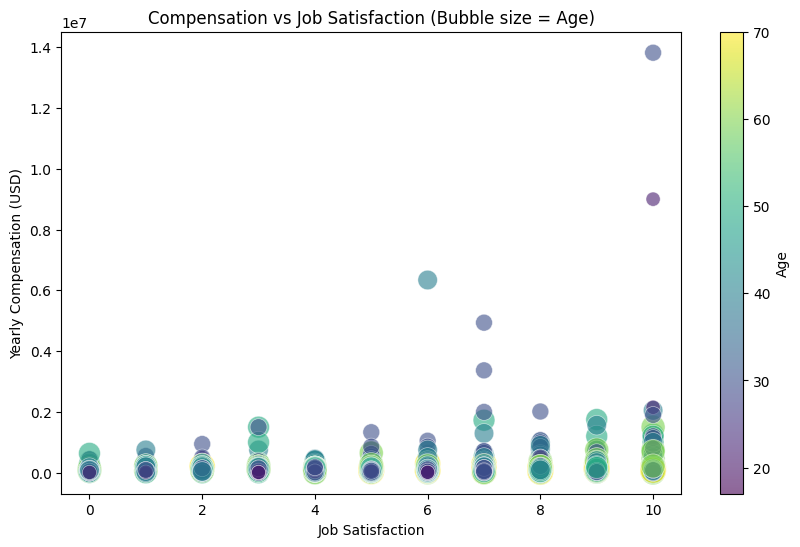

In [13]:
def age_to_num(age_str):
    mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    return mapping.get(age_str, None)

# Apply the mapping to create a numeric Age column
df['Age_num'] = df['Age'].apply(age_to_num)

plot_df = df[['ConvertedCompYearly', 'JobSat', 'Age_num']].dropna()

plt.figure(figsize=(10,6))
plt.scatter(
    plot_df['JobSat'],
    plot_df['ConvertedCompYearly'],
    s=plot_df['Age_num']*5,
    alpha=0.6,
    c=plot_df['Age_num'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)
plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Compensation vs Job Satisfaction (Bubble size = Age)')
plt.colorbar(label='Age')
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_404/3342667279.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_404/3342667279.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')
/tmp/ipykernel_404/3342667279.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

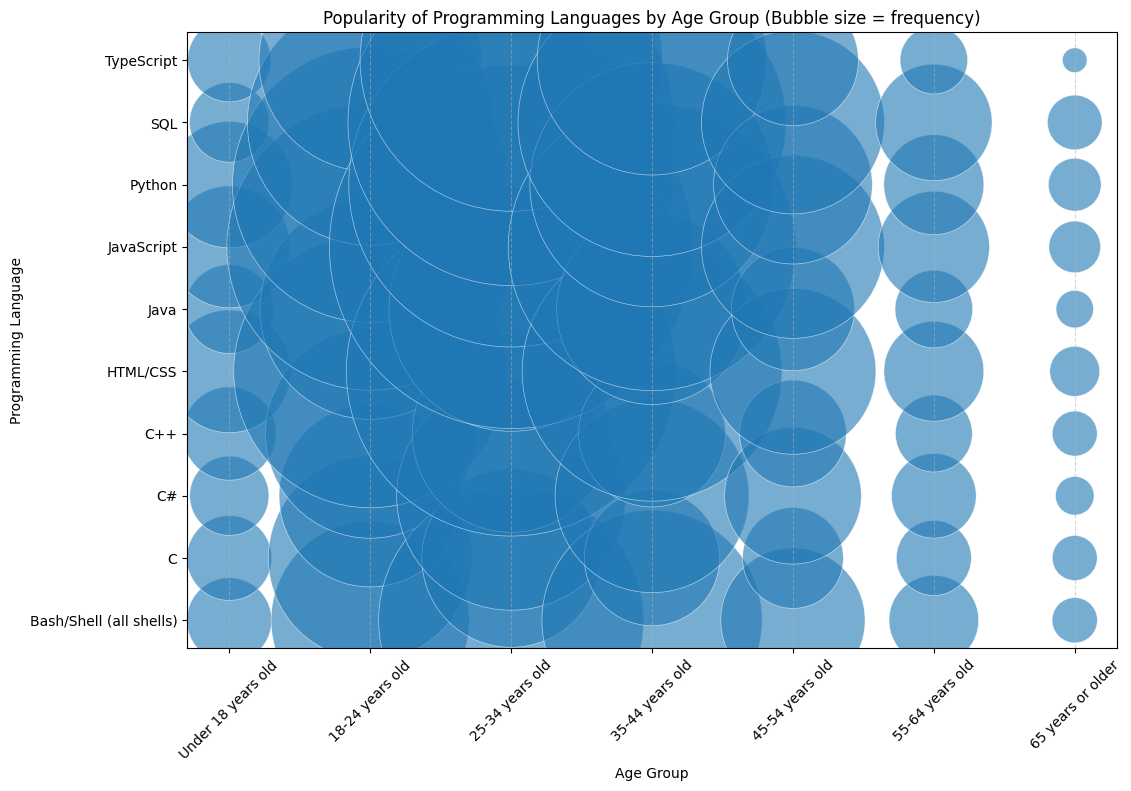

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare the data
# Drop rows where languages or Age are missing
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'Age'])

# Map Age categories to approximate numeric values (optional if you want numeric x-axis)
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# You can keep Age as categorical ordered for plotting
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Step 2: Explode languages so each row is one language per respondent
df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('LanguageHaveWorkedWith')

# Strip spaces from languages
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()

# Step 3: Count frequency of each language by age group
counts = df_exploded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Optional: Select top N languages overall to reduce clutter
top_languages = counts.groupby('LanguageHaveWorkedWith')['Count'].sum().nlargest(10).index
counts_top = counts[counts['LanguageHaveWorkedWith'].isin(top_languages)]

# Step 4: Plot bubble plot
plt.figure(figsize=(12, 8))

# Create scatter plot with Age on x, Language on y, bubble size = Count
# Convert Age categories to numbers for plotting
age_num = counts_top['Age'].cat.codes

plt.scatter(
    age_num,
    counts_top['LanguageHaveWorkedWith'],
    s=counts_top['Count'] * 5,   # scale bubble size as needed
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.title('Popularity of Programming Languages by Age Group (Bubble size = frequency)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


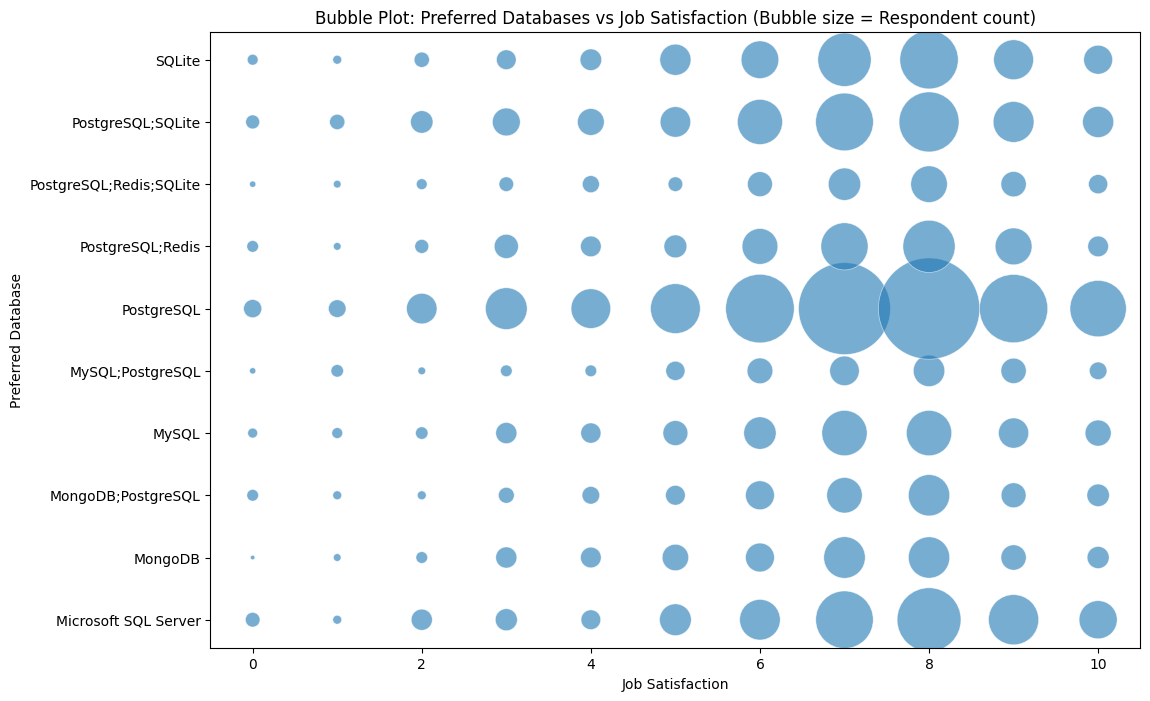

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame and it has 'DatabaseWantToWorkWith' and 'JobSat' columns

# Drop missing values in these two columns
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# Group by database and job satisfaction, then count the respondents
grouped = df_db.groupby(['DatabaseWantToWorkWith', 'JobSat']).size().reset_index(name='Count')

# For better visualization, pick top 10 databases by total counts
top_dbs = df_db['DatabaseWantToWorkWith'].value_counts().head(10).index
grouped = grouped[grouped['DatabaseWantToWorkWith'].isin(top_dbs)]

# Create the bubble plot
fig, ax = plt.subplots(figsize=(12, 8))

# Map database names and job satisfaction to numeric for plotting
db_categories = grouped['DatabaseWantToWorkWith'].unique()
db_to_num = {db: i for i, db in enumerate(db_categories)}
grouped['DB_num'] = grouped['DatabaseWantToWorkWith'].map(db_to_num)

# Plot bubbles
scatter = ax.scatter(
    grouped['JobSat'], 
    grouped['DB_num'], 
    s=grouped['Count'] * 10,  # scale bubble size
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Labeling
ax.set_yticks(range(len(db_categories)))
ax.set_yticklabels(db_categories)
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Preferred Database')
ax.set_title('Bubble Plot: Preferred Databases vs Job Satisfaction (Bubble size = Respondent count)')

plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_404/1596854583.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['DevType_num'] = df_top['DevType'].map(devtype_to_num)


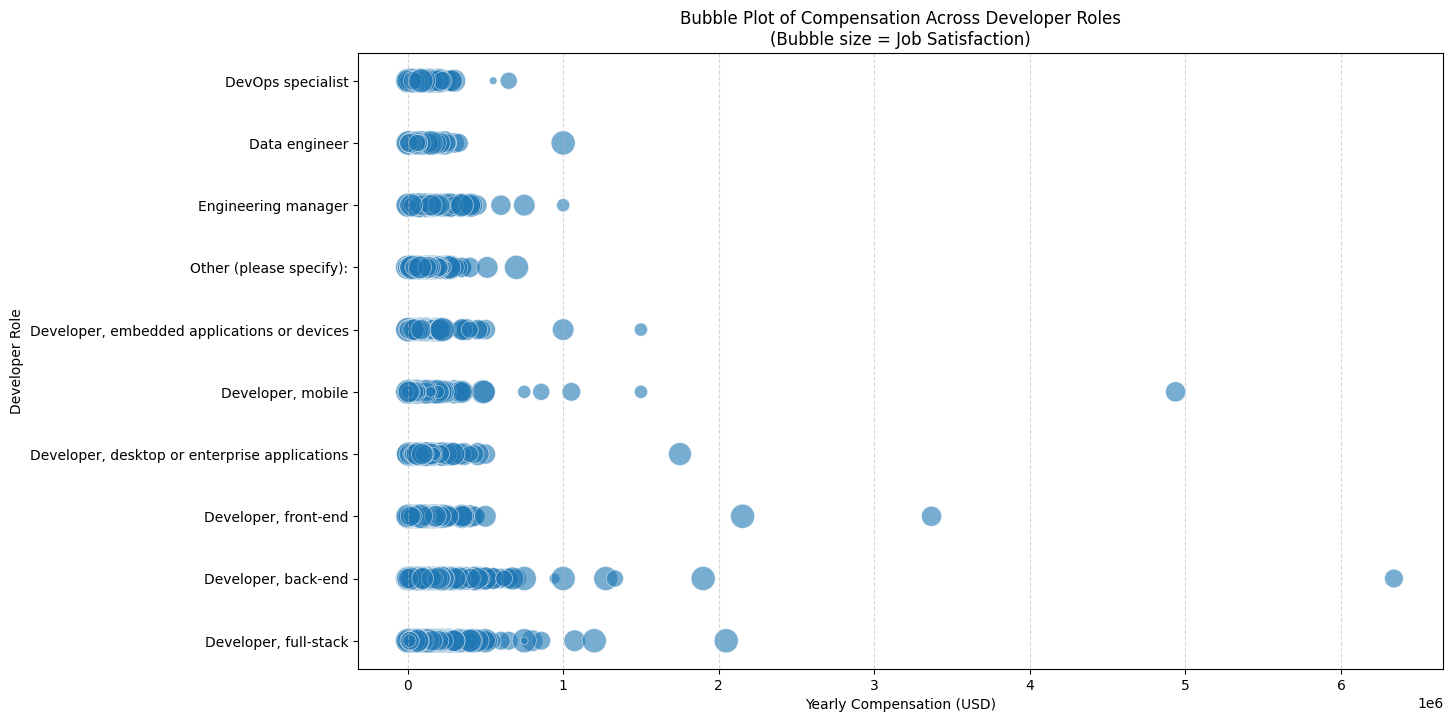

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'ConvertedCompYearly', 'DevType', and 'JobSat'

# Drop rows with missing relevant values
df_clean = df[['ConvertedCompYearly', 'DevType', 'JobSat']].dropna()

# Explode multiple DevType entries (separated by ';') into separate rows
df_clean['DevType'] = df_clean['DevType'].str.split(';')
df_exploded = df_clean.explode('DevType')

# Optionally, strip whitespace
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# For clarity, choose top 10 most common developer roles
top_devtypes = df_exploded['DevType'].value_counts().head(10).index
df_top = df_exploded[df_exploded['DevType'].isin(top_devtypes)]

# Map DevType to numeric for y-axis plotting
devtype_to_num = {role: i for i, role in enumerate(top_devtypes)}
df_top['DevType_num'] = df_top['DevType'].map(devtype_to_num)

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    df_top['ConvertedCompYearly'], 
    df_top['DevType_num'], 
    s=df_top['JobSat'] * 30,   # Bubble size scaled by job satisfaction
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

plt.yticks(ticks=range(len(top_devtypes)), labels=top_devtypes)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.title('Bubble Plot of Compensation Across Developer Roles\n(Bubble size = Job Satisfaction)')

plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [ ]:
##Write your code here

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
##Write your code here

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
